#**Dimensionality Reduction Demystified for Beginners**

###**필요 라이브러리와 데이터 로드**

In [1]:
#라이브러리 로드
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.datasets import load_breast_cancer

#데이터 셋 로드
cancer = load_breast_cancer()
(X_canc, y_canc) = load_breast_cancer(return_X_y=True)

###**함수 생성**

In [2]:
def plot_labelled_scatter(X, y, class_labels, s):
  num_labels = len(class_labels)

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  marker_array = ['o', '^', '*']
  color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
  cmap_bold = ListedColormap(color_array)
  bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors = num_labels)
  plt.figure(figsize=s)

  plt.scatter(X[:,0], X[:,1], s=80, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.4,
              edgecolor='black',lw = 1)
  sp = plt.gca().spines
  sp['top'].set_visible(False)
  sp['right'].set_visible(False)

  plt.grid(which='both', color='lightslategrey', alpha=0.3)

  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)

  h = []
  for c in range(0, num_labels):
    h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h, fontsize = 15, frameon = False)

###**차원 축소**

- 차원 축소(Dimensionality Reduction)"는 변환 범주에 속하는 중요한 비지도 학습 방법의 집합
- 예를 들어, 200개의 특성이 있을 10개의 차원만 사용하는 데이터 셋으로 변환하는 과정
- 차원 축소의 일반적인 필요성은 데이터 셋을 처음 탐색할 때 발생
- 이 과정을 통해 샘플들이 어떻게 그룹화되거나 어떻게 관련되어 있는지를 이해할 수 있으며, 이를 2차원 scaater plot으로 시각화할 수 있음
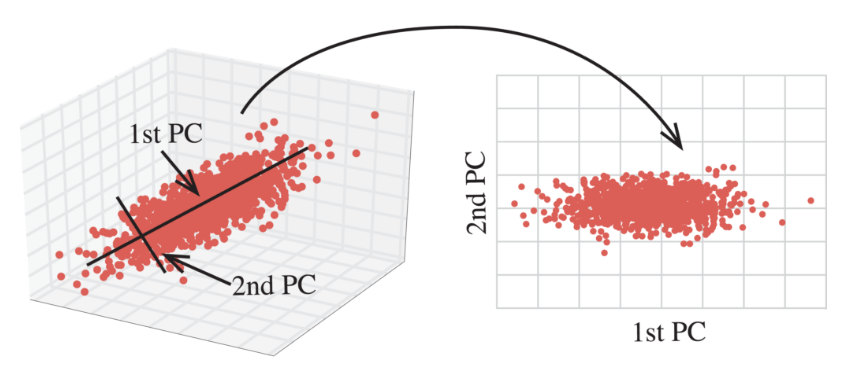

###**간단한 차원 축소 알고리즘/방법 종류**

1. Principle Component Analysis (PCA)
2. Multi-dimensional Scaling (MDS)
3. T-distributed Stochastic Neighbor Embedding (t-SNE)

##**1. Principle Component Analysis (PCA)**

- 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법
- 차원들이 통계적으로 상관하지 않게 됨
- PCA는 일반적으로 원래 데이터셋에서 가장 유용한 초기 차원만 남기고 나머지는 제거
- 수학적 측면에서 :
  실수 p-공간에 있는 점들의 집합에서 주성분은 방향 벡터의 순서로, 각 벡터는 데이터를 가장 잘 맞추는 직선의 방향을 나타내며, 처음의 벡터들과 직교(orthogonal)

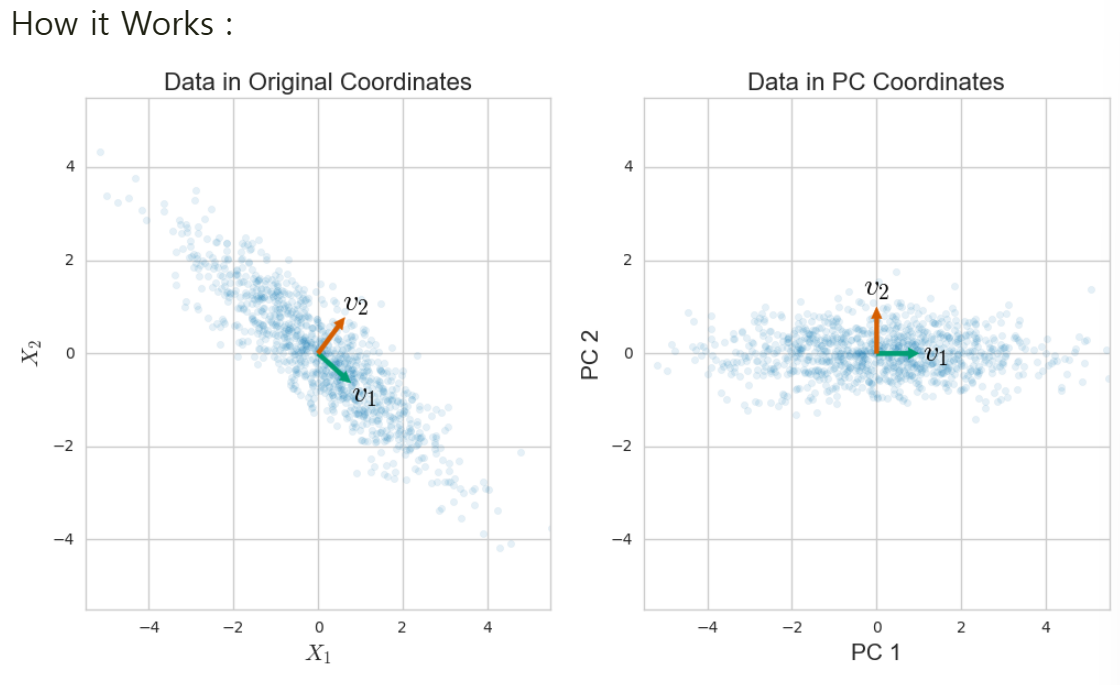

두 개의 원래 특성(X1, X2)을 갖고 있고 높은 상관관계가 있다고 가정
  - PCA는 데이터를 회전시켜서 가장 큰 변동성 방향인 첫 번째 주성분(PC1)을 찾음
  - 그 다음 PCA는 나머지 변동성을 최대한 포착하는 직각 방향(v2)을 찾아서 두 번째 주성분(PC2) 생성
    - 2차원에서는 첫 번째 주성분에 대해 직각인 방향이 하나만 존재하지만, 더 높은 차원에서는 무한히 많은 방향 존재 가능
  - 2차원 이상인 경우
    - 이전 주성분과 직각인 방향으로 연속적인 주성분을 찾는 과정이 계속 됨
    - 원하는 수의 주성분이 도달할 때까지 반복

###**유방암 데이터 셋의 처음 두개의 주성분 찾기 위해 PCA 이용하기**

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# PCA 적용 전, 각 피처는 평균은 0이고 단위 분산이어야 한다 -> 정규화 필요
canc_norm = StandardScaler().fit(X_canc).transform(X_canc)

pca = PCA(n_components=2).fit(canc_norm)

canc_pca = pca.transform(canc_norm)

print('Number of Features in Breast Cancer DataSet Before PCA :{}\n\nNumber of Features in Breast Cancer DataSet After PCA:{}'.
      format(X_canc.shape[1], canc_pca.shape[1]))

Number of Features in Breast Cancer DataSet Before PCA :30

Number of Features in Breast Cancer DataSet After PCA:2


###**유밤암 데이터 셋의 PCA 변환 버전 시각화**
- 데이터 셋의 피처 수가 2개로 줄어듦
- PCA를 사용할 때 일부 정보가 손실될 수 있지만, 그 대신 특성 간의 관계를 더 잘 이해하고 더 잘 시각화할 수 있다는 데에 이점이 있음


Text(0.5, 1.0, 'Breast Cancer Dataset PCA (n_components = 2)')

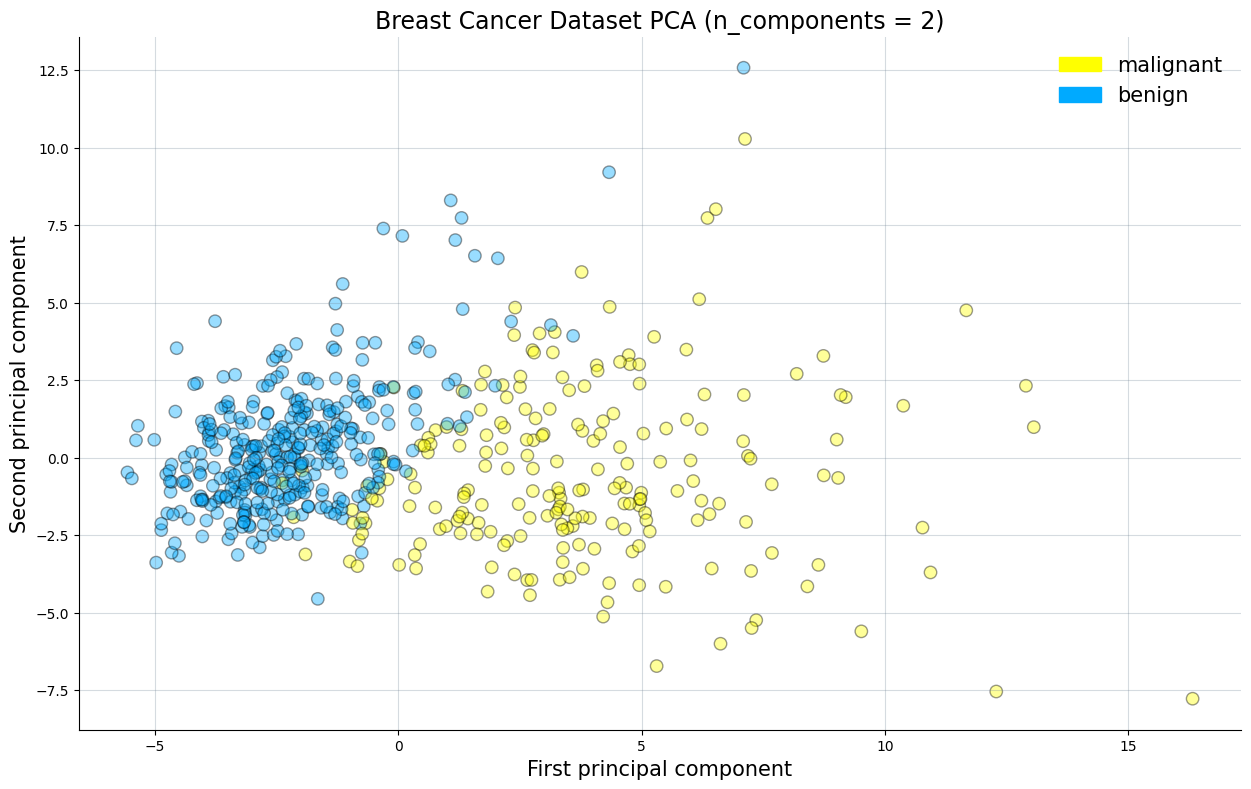

In [4]:
plot_labelled_scatter(canc_pca, y_canc, ['malignant','benign'],(15,9))

plt.xlabel('First principal component',fontsize=15)
plt.ylabel('Second principal component',fontsize=15)
plt.title('Breast Cancer Dataset PCA (n_components = 2)',fontsize=17)

- 2개의 target class들이 간단한 로지스틱 회귀만으로 쉽게 분리된 수 있음을 확인 가능
- 따라서, 이 경우의 PCA는 해석하기 쉬울 뿐만 아니라 분류하기에도 용이한 결과를 제공

###**초기 30개 피처들 간의 상관관계를 파악하기 위해 PCA를 사용하기**

- PCA는 상관관계를 확인하기 위해 '.components_'를 제공

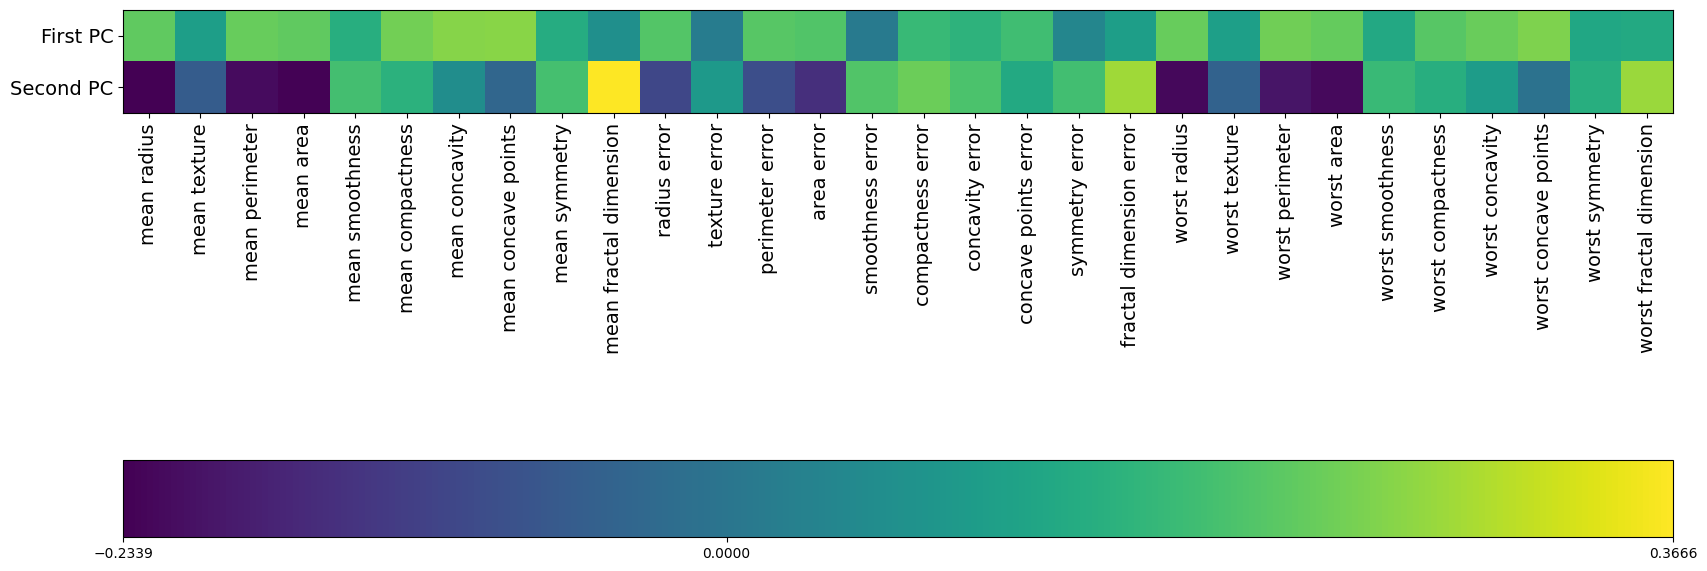

In [5]:
fig = plt.figure(figsize=(20,9))
plt.imshow(pca.components_, interpolation='none', cmap = 'viridis')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(len(feature_names)))
plt.gca().set_yticks(np.arange(2))
plt.gca().set_xticklabels(feature_names, rotation=90, fontsize=14)
plt.gca().set_yticklabels(['First PC', 'Second PC'], fontsize=14)

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0,
                                              pca.components_.max()], pad=0.5)

- 첫 번째 주성분은 모두 양수 : 30개 피처 간에 일반적인 상관관계가 있음을 보여줌
  
  => 즉 이들은 비례
- 두 번째 주성분은 양수와 음수가 섞임.
  - 특히, 음수값을 가진 특성들이 함께 변동하며 나머지 특성과는 반대 방향으로 변화하는 클러스터를 볼 수 있음
  

###**PCA 참고사항**
- PCA는 데이터 셋을 탐색하는 데 유용한 초기 도구 제공
- PCA는 더 복잡한 데이터 셋에서 더 미묘한 그룹을 찾는 데 한계가 있을 수 있

##**2. Multi-Dimensional Scaling : (MDS)**

- "매니폴드 학습 알고리즘"이라고 불리는 비지도 알고리즘의 집합이 있으며, 이 알고리즘들은 고차원 데이터에서 저차원 구조를 찾는 데 매우 능숙하고 시각화에 유용함
- 클라식한 예시 : 'Swiss Role DataSet'
  - 이 데이터 포인트는 2차원 시트 위에 위치
- 'manifold' : 고차원 공간 내의 이러한 저차원 시트
- PCA는 이러한 흥미로운 구조를 찾기엔 충분히 정교하지 X
- 널리 사용되는 매니폴드 학습 방법 중 하나는 다차원 스케일링 혹은 MDS라고 불리는 이것임
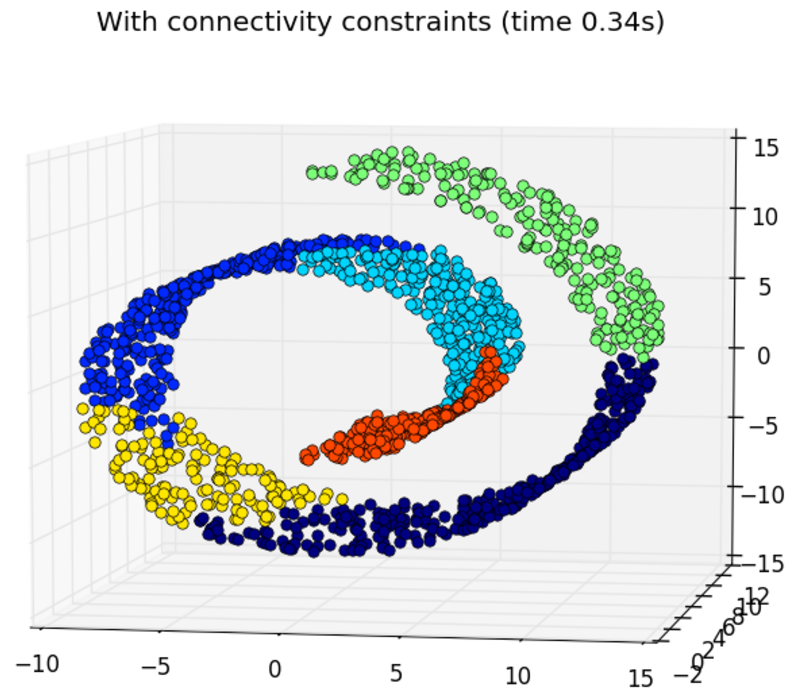

###**MDS의 종류**
- MDS의 일반적인 목표 : 고차원 데이터 셋 시각화, 이를 저차원 공간(대부분의 경우 2차원 평면)으로 투영
- 이 과정에서 원래 데이터 공간에서 포인트들이 가까운 정도에 대한 정보를 보존하는 방식이 이뤄짐
- 이러한 방식으로 고차원 데이터에서 클러스터링 행동을 찾고 시각화

###**유방암 데이터 셋에 MDS 사용하기**

Number of Features in Breat Cancer DataSet Before MDS : 30

Number of Features in Breast Cancer DataSet After MDS : 2


Text(0.5, 1.0, 'Breast Cancer Dataset MDS (n_components = 2)')

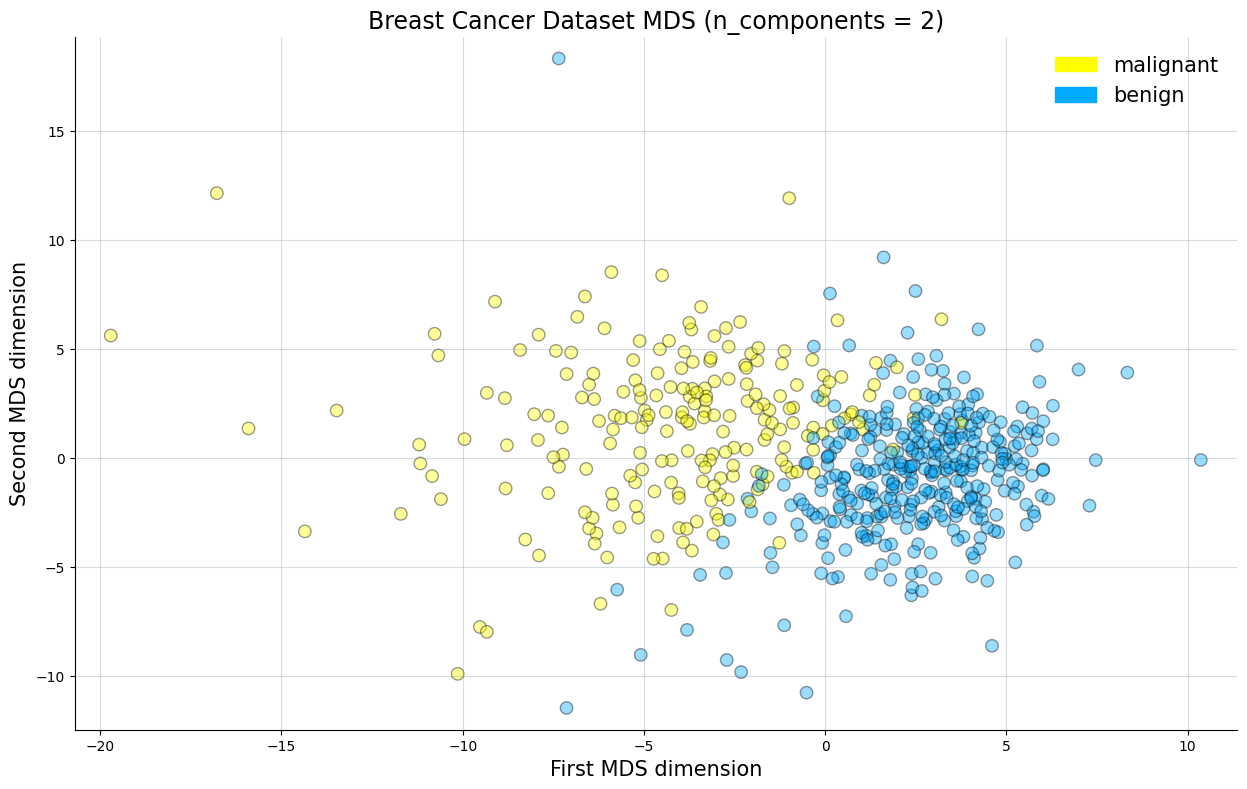

In [6]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=2)

canc_mds = mds.fit_transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before MDS : {}\n\nNumber of Features in Breast Cancer DataSet After MDS : {}'
      .format(X_canc.shape[1],canc_mds.shape[1]))

plot_labelled_scatter(canc_mds, y_canc, ['malignant','benign'],(15,9))
plt.xlabel('First MDS dimension',fontsize=15)
plt.ylabel('Second MDS dimension',fontsize=15)
plt.title('Breast Cancer Dataset MDS (n_components = 2)',fontsize=17)

###**MDS 참고사항**
- MDS가 PCA와 유사한 작업을 했지만 MDS와 PCA의 분포에 차이가 있음
  - 두 알고리즘이 다른 원리에 따라 작동하고 다른 수학적 모델을 사용하기 때문
- 알고리즘 뒤에 있는 수학에 대해서는 scikit learn 문서를 읽을 수 있으며 다양한 파라미터 조정 가능
  - 그러나 이 섹션은 노트북 범위에서 벗어남

##**3. T-distributed Stochastic Neighbor Embedding (t-SNE)**

- 데이터를 시각화 하는 데 특히 강력한 manifold learning 알고리즘
- t-SNE는 2차원 표현을 찾아, 2D 산점도에서의 점들 간의 거리가 원래 고차원 데이터 셋에서의 점들 간의 거리와 최대한 일치하도록 함
- 특히, t-SNE는 이웃인 점들 간의 거리 정보를 보존하는 데 훨씬 더 많은 비중을 둠
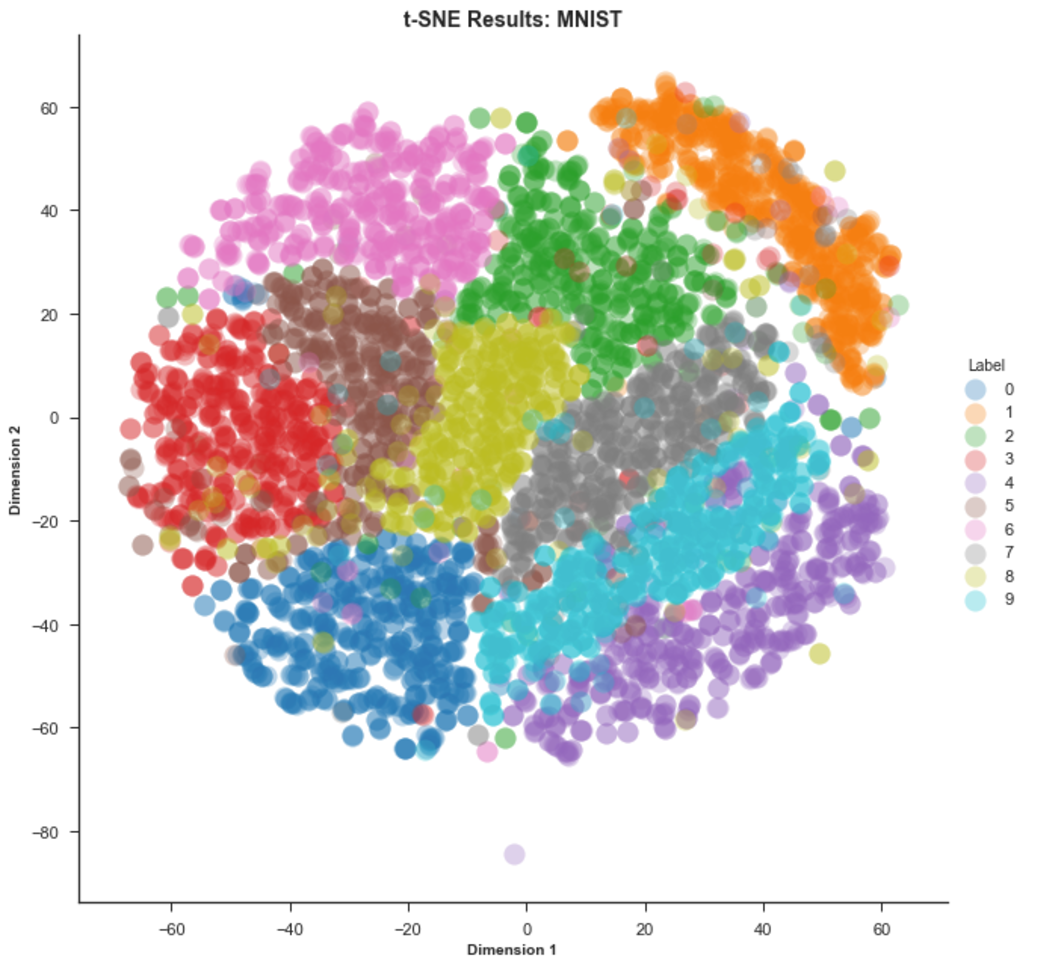

###**유방암 데이터 셋에 T-SNE 이용하기**

Number of Features in Breat Cancer DataSet Before T-SNE : 30

Number of Features in Breast Cancer DataSet After T-SNE : 2


Text(0.5, 1.0, 'Breast Cancer Dataset T-SNE')

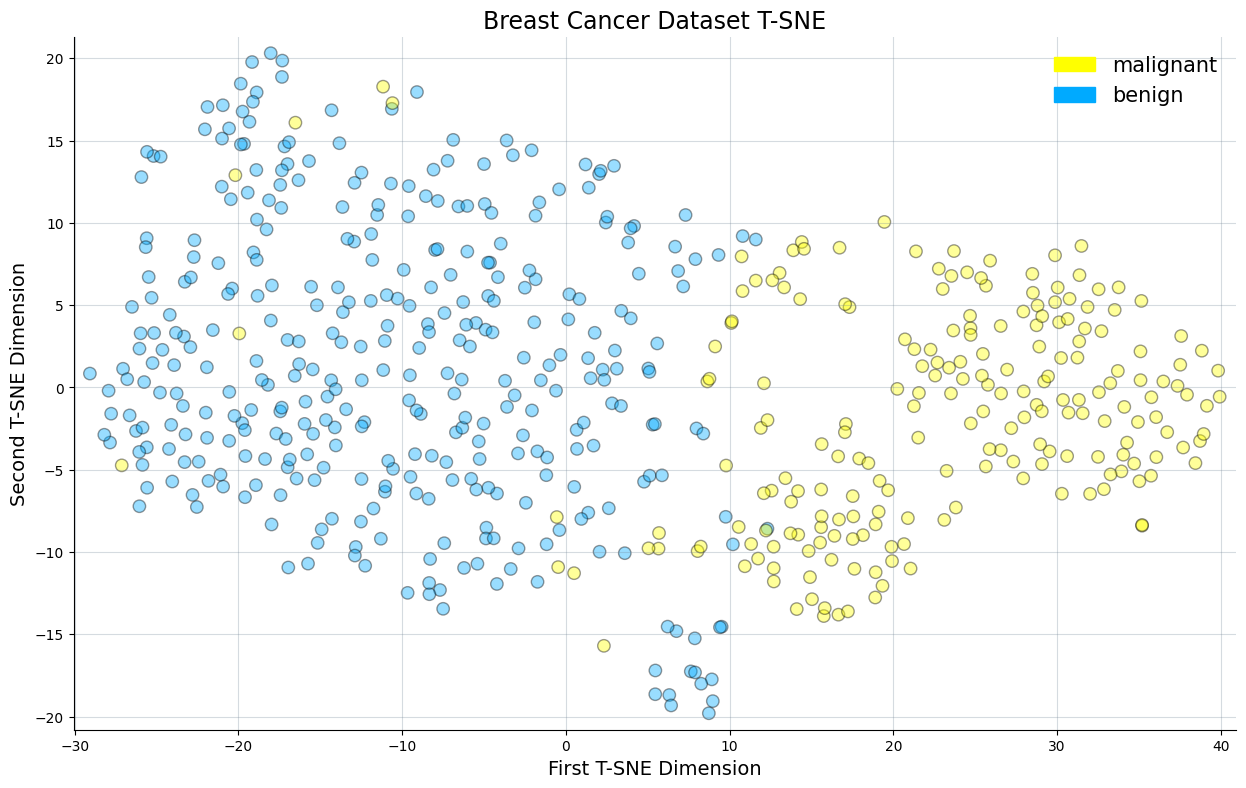

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)

canc_tsne = tsne.fit_transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before T-SNE : {}\n\nNumber of Features in Breast Cancer DataSet After T-SNE : {}'
      .format(X_canc.shape[1],canc_tsne.shape[1]))

plot_labelled_scatter(canc_tsne, y_canc, ['malignant','benign'],(15,9))

plt.xlabel('First T-SNE Dimension',fontsize=14)
plt.ylabel('Second T-SNE Dimension',fontsize=14)
plt.title('Breast Cancer Dataset T-SNE',fontsize=17)

###**T-SNE 참고사항**
- t-SNE는 유방암 데이터셋에서 구조를 잘 찾아냄
- 이는 우리가 데이터 시각화를 위해 manifold learning을 사용할 때, 특정 데이터셋에 가장 적합한 방법을 찾기 위해 최소 몇 가지 다른 접근 방식을 시도해야 함
- t-SNE는 보다 명확한 local structure가 있는 데이터 셋에서 더 잘 작동하는 경향
  -> 즉 이웃 간의 패턴이 더 뚜렷이 정의된 경우에 더 효과적